<a href="https://colab.research.google.com/github/snig-17/BASC0080/blob/main/MonteCarlo_Quantum_Mechanics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
**Quantum Mechanics:** The Double Slit Experiment

---

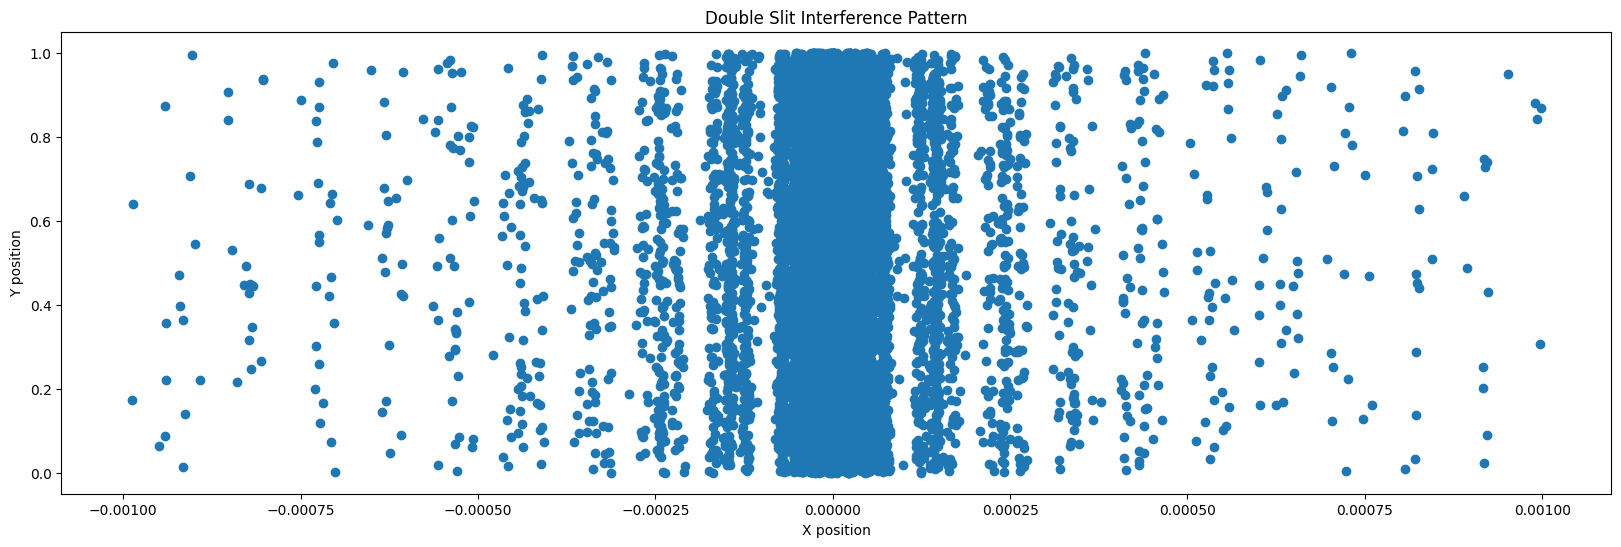

<Figure size 1200x600 with 0 Axes>

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

#Parameters used
#m = Particle mass in kg
#v = Particle velocity in m/s

#lamb = h/(m*v) De Broglie wavelength, scaled to be used in this modeled
#a = SLit width in meters
#d = Distance between slits in meters
#l = Distance to screen in meters


def Diffraction(a,d,lamb,l,x):

  #Calculating some constants
  c = (np.pi*d)/(lamb*l)
  k = (np.pi*a)/(lamb*l)

  #Probability function
  probability = ((np.cos(c*x))**2)*(((np.sin(k*x))/(k*x))**2)

  return probability


def MonteCarlo(a,d,lamb,l):
  #Monte Carlo throw for a particle at a given position on our viewing screen
  x = np.random.uniform(-0.001,.001) #between -1 mm and 1 mm
  p = Diffraction(a,d,lamb,l,x)
  rand = np.random.uniform(0,1)
  if (p >=rand):
    return x


#Parameters of our system
m = 9.1*10**-31 #Mass of electron
v = 5*10**5 #velocity

lamb = 6.62*10**-34/(m*v) #De Broglie wavelength
a = 150*10**-6 #Slit width
d = 600*10**-6 #Distance between slits
l = 10 #Distance to screen

#The loop that runs the Monte Carlo to generate the interference pattern
numParticles = 10**6
particles = []
for i in range(numParticles):
  #Rolling a random y value as well to give our bands vertical spread
  y = np.random.uniform(0,1)
  x = MonteCarlo(a,d,lamb,l)
  if x != None:
    particles.append([x,y])

#Visualization of the interference pattern
particles = np.array(particles)
plt.figure(figsize = (20,6))
plt.scatter(particles[:,0],particles[:,1])
plt.title("Double Slit Interference Pattern")
plt.xlabel("X position")
plt.ylabel("Y position")
plt.show()

plt.figure(figsize = (12,6))

plt.tight_layout()
plt.show()